In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import f_oneway

In [2]:
crimes = pd.read_csv('/Users/yadavvinamrata/Documents/Crimes_-_2016_to_2020.csv')

In [3]:
crimes.head()

,ID,Case Number,Date,Block,Crime_Type,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,MISDEMEANOR,THEFT,OVER $500,RESIDENCE,0,1,631,6.0,8.0,44.0,2018,2019-04-06 16:04:43,NaN,NaN,NaN
1,11645836,JC212333,2016-05-01 00:25:00,055XX S ROCKWELL ST,MISDEMEANOR,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,0,0,824,8.0,15.0,63.0,2016,2019-04-06 16:04:43,NaN,NaN,NaN
2,12014684,JD189901,2020-03-17 21:30:00,039XX N LECLAIRE AVE,MISDEMEANOR,THEFT,$500 AND UNDER,STREET,0,0,1634,16.0,45.0,15.0,2020,2020-03-25 15:45:43,41.952052,-87.754660,"(41.952051946, -87.754660372)"
3,11645648,JC212959,2018-01-01 08:00:00,024XX N MONITOR AVE,MISDEMEANOR,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,0,0,2515,25.0,30.0,19.0,2018,2019-04-06 16:04:43,NaN,NaN,NaN
4,11864018,JC476123,2019-09-24 08:00:00,022XX S MICHIGAN AVE,MISDEMEANOR,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,COMMERCIAL / BUSINESS OFFICE,0,0,132,1.0,3.0,33.0,2019,2019-10-20 15:56:02,41.852248,-87.623786,"(41.852248185, -87.623786256)"


In [4]:
crimes.shape

(1277232, 19)

In [5]:
#crimes.pivot_table(index = 'Location Description', values ='Primary Type',aggfunc= 'count').plot()

In [6]:
crimes['Location Description'].nunique()

190

In [7]:
crimes['Community Area'].nunique()

77

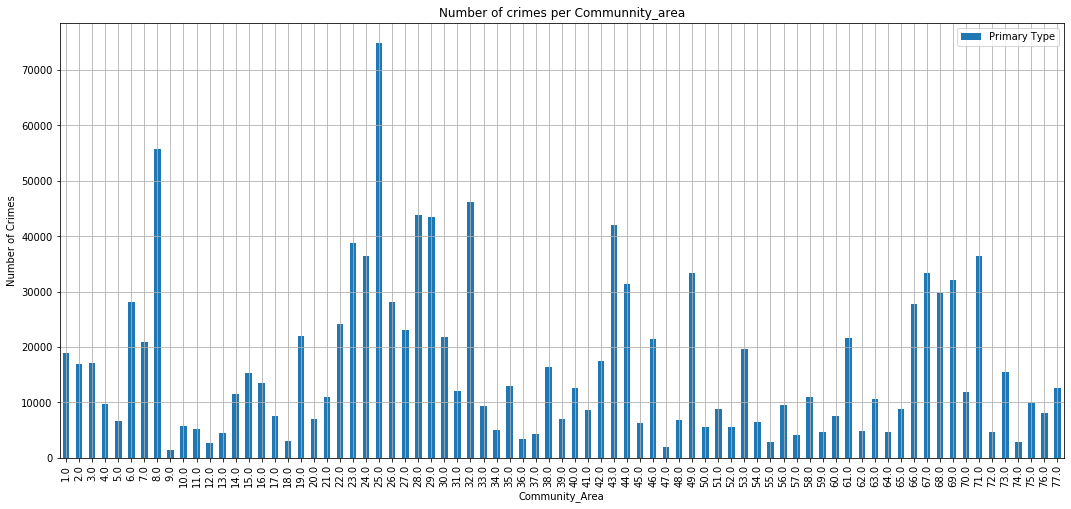

In [85]:
fig = plt.figure(figsize = (18,8))
crimes.groupby('Community Area')['Primary Type'].count().plot(kind = 'bar')
plt.title('Number of crimes per Communnity_area')
plt.xlabel('Community_Area')
plt.ylabel('Number of Crimes')
plt.grid()
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [80]:
crimes.groupby('Community Area')['Primary Type'].describe()

,count,unique,top,freq
Community Area,,,,
1.0,18985,30,THEFT,5274
2.0,16983,28,THEFT,4147
3.0,17075,29,THEFT,4723
4.0,9616,28,THEFT,2858
5.0,6587,28,THEFT,2353
...,...,...,...,...
73.0,15403,29,BATTERY,2972
74.0,2755,26,THEFT,649
75.0,9831,27,THEFT,2142


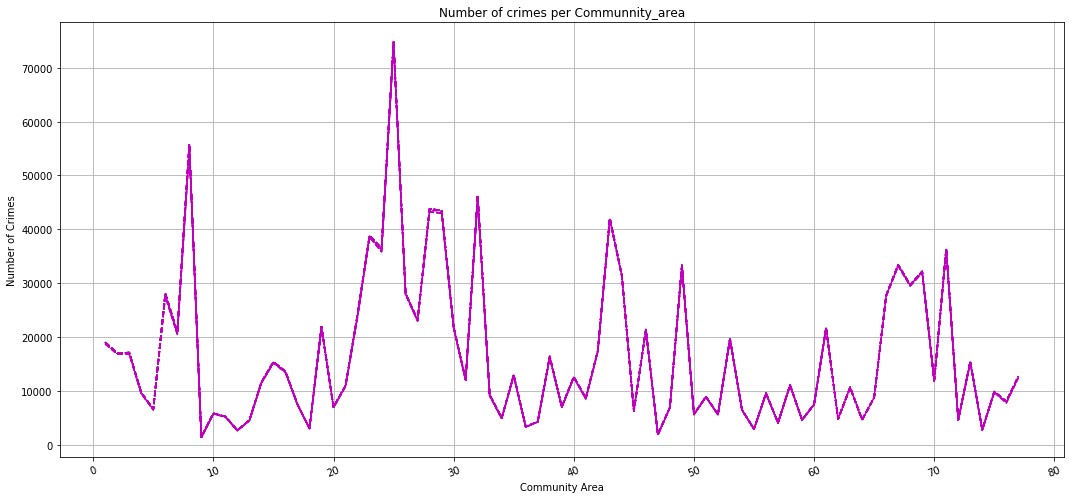

In [81]:
fig = plt.figure(figsize = (18,8))
plt.plot(crimes.groupby('Community Area').count(), 'm--')
plt.title('Number of crimes per Communnity_area')
plt.xlabel('Community Area')
plt.ylabel('Number of Crimes')
plt.grid()
plt.xticks(rotation = 20)
#plt.legend()
plt.show()

In [82]:
crimes['Primary Type'].unique()

array(['THEFT', 'DECEPTIVE PRACTICE', 'OTHER OFFENSE',
       'MOTOR VEHICLE THEFT', 'CRIMINAL SEXUAL ASSAULT', 'BURGLARY',
       'CRIMINAL DAMAGE', 'ASSAULT', 'OFFENSE INVOLVING CHILDREN',
       'BATTERY', 'SEX OFFENSE', 'NARCOTICS', 'WEAPONS VIOLATION',
       'ROBBERY', 'CRIMINAL TRESPASS', 'LIQUOR LAW VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'ARSON', 'PROSTITUTION',
       'PUBLIC PEACE VIOLATION', 'OBSCENITY', 'STALKING', 'KIDNAPPING',
       'NON-CRIMINAL', 'INTIMIDATION',
       'CONCEALED CARRY LICENSE VIOLATION', 'HOMICIDE', 'GAMBLING',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY',
       'HUMAN TRAFFICKING', 'RITUALISM'], dtype=object)

In [83]:
crimes.groupby('Community Area')['Primary Type'].max().unique()

array(['WEAPONS VIOLATION'], dtype=object)

In [84]:
crimes.groupby('Community Area')['Primary Type'].min().unique()

array(['ARSON'], dtype=object)

Weapons violation is the most happened crime in community 25

In [12]:
crimes.groupby('Location Description')['Primary Type'].max().unique()

array(['WEAPONS VIOLATION', 'THEFT', 'HOMICIDE', 'OTHER OFFENSE'],
      dtype=object)

In [86]:
crimes.groupby('Location Description')['Primary Type'].min().unique()

array(['ARSON', 'ASSAULT', 'HOMICIDE', 'BATTERY', 'BURGLARY', 'THEFT'],
      dtype=object)

WEAPONS VIOLATION, THEFT, HOMICIDE, OTHER OFFENSE these are the maximum numbers of crime happened per location 

In [87]:
x = crimes.groupby('Community Area')['Primary Type'].value_counts()

In [88]:
x.head()

Community Area  Primary Type      
1.0             THEFT                 5274
                BATTERY               3559
                CRIMINAL DAMAGE       2384
                DECEPTIVE PRACTICE    1362
                ASSAULT               1337
Name: Primary Type, dtype: int64

In [134]:
crimes_date = crimes[["ID","Community Area","Location Description","Arrest","Domestic","Date", "Year"]].copy()
crimes_date["Month"] = pd.DatetimeIndex(crimes["Date"]).month
crimes_date["Day"] = pd.DatetimeIndex(crimes["Date"]).day
crimes_date["WeekDay"] = pd.DatetimeIndex(crimes["Date"]).dayofweek
crimes_date["Hour"] = pd.DatetimeIndex(crimes["Date"]).hour
crimes_date["Minutes"] = pd.DatetimeIndex(crimes["Date"]).minute
crimes_date

,ID,Community Area,Location Description,Arrest,Domestic,Date,Year,Month,Day,WeekDay,Hour,Minutes
0,11646166,44.0,RESIDENCE,0,1,2018-09-01 00:01:00,2018,9,1,5,0,1
1,11645836,63.0,NaN,0,0,2016-05-01 00:25:00,2016,5,1,6,0,25
2,12014684,15.0,STREET,0,0,2020-03-17 21:30:00,2020,3,17,1,21,30
3,11645648,19.0,RESIDENCE,0,0,2018-01-01 08:00:00,2018,1,1,0,8,0
4,11864018,33.0,COMMERCIAL / BUSINESS OFFICE,0,0,2019-09-24 08:00:00,2019,9,24,1,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1277227,12305659,68.0,RESIDENCE,0,0,2020-12-15 17:00:00,2020,12,15,1,17,0
1277228,12305418,1.0,PARK PROPERTY,0,0,2017-02-23 00:00:00,2017,2,23,3,0,0
1277229,12305346,10.0,RESIDENCE,0,1,2019-03-02 00:00:00,2019,3,2,5,0,0
1277230,12305191,39.0,RESIDENCE,0,0,2020-11-28 19:55:00,2020,11,28,5,19,55


In [135]:
crimes['Location Description'].isna().nunique()

2

In [136]:
C_D_A = crimes_date.pivot_table(index = 'Community Area', columns = 'Domestic', values = 'Arrest', aggfunc = 'sum' )

In [137]:
C_D_A.columns = ['no','yes']
C_D_A

,no,yes
Community Area,,
1.0,2551,462
2.0,1611,434
3.0,2570,357
4.0,1027,172
5.0,608,70
...,...,...
73.0,2342,488
74.0,280,63
75.0,1489,268


## Test on domestic arrest per community

In [138]:
from scipy.stats import ttest_ind

In [139]:
ttest_ind(C_D_A.no,C_D_A.yes, equal_var=False)

Ttest_indResult(statistic=6.313600183467634, pvalue=1.4536057041847327e-08)

In [140]:
ttest_1samp(C_D_A.no,C_D_A.yes)

Ttest_1sampResult(statistic=Community Area
1.0     6.382405
2.0     6.459899
3.0     6.673006
4.0     7.185018
5.0     7.467316
          ...   
73.0    6.310447
74.0    7.486689
75.0    6.919325
76.0    7.395358
77.0    7.027263
Name: yes, Length: 77, dtype: float64, pvalue=array([1.24778184e-08, 8.97152671e-09, 3.60346773e-09, 3.92841711e-10,
       1.14440940e-10, 1.30667262e-09, 1.56812924e-10, 7.51511614e-09,
       6.95885101e-11, 1.76991342e-10, 2.57482987e-10, 7.85715160e-11,
       1.09023637e-10, 9.56773540e-10, 1.55992682e-08, 1.58245312e-09,
       1.30667262e-09, 1.88030051e-10, 5.19358294e-07, 1.10487825e-09,
       1.54504469e-09, 2.40608896e-08, 9.12250582e-06, 6.91820691e-09,
       7.95252726e-01, 1.14896577e-07, 9.13145161e-08, 4.11235783e-08,
       5.23397376e-04, 1.45892157e-06, 2.31920233e-09, 6.06073444e-10,
       1.85768788e-10, 1.33968426e-10, 1.29111704e-09, 1.40619899e-10,
       1.35601317e-10, 1.45380551e-08, 4.02429861e-10, 8.26000838e-09,
       1.66598

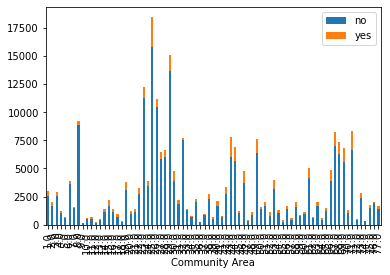

In [95]:
C_D_A.plot(kind='bar', stacked=True)

In [147]:
#fig = plt.figure(figsize = (18,8))
#sns.barplot(data = C_D_A )
#fig.show()

## Hypothesis Testing

In [97]:
Arrest_per_month = crimes_date.pivot_table(index = 'Year', columns = 'Month',values = 'Arrest', aggfunc = 'sum')

In [98]:
Arrest_per_month.columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October','November', 'December']

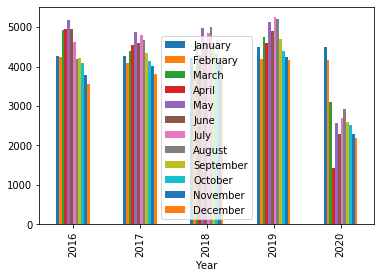

In [99]:
x= Arrest_per_month.plot(kind = 'bar')

In [100]:
f_oneway(Arrest_per_month.January,Arrest_per_month.February, Arrest_per_month.March, Arrest_per_month.April, Arrest_per_month.May, Arrest_per_month.June, Arrest_per_month.July,Arrest_per_month.August,Arrest_per_month.September, Arrest_per_month.October, Arrest_per_month.November,Arrest_per_month.December)

F_onewayResult(statistic=0.5691707883417721, pvalue=0.84395424365613)

In [101]:
f_oneway(Arrest_per_month.January,Arrest_per_month.February)

F_onewayResult(statistic=7.670161739209173, pvalue=0.024315232638112246)

Since the p-value is very high, So that we cant reject the null hypothesis, It means that the arrest is not changing per month

/Users/yadavvinamrata/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


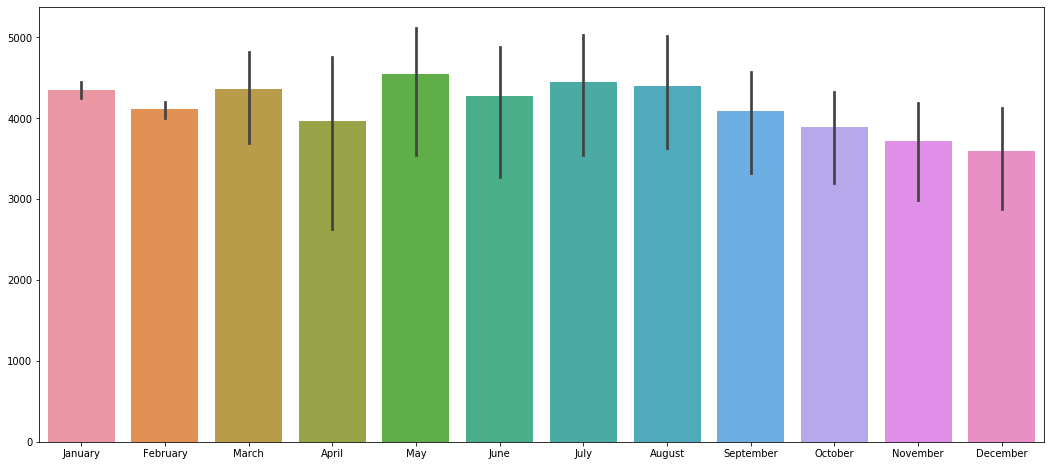

In [102]:
fig = plt.figure(figsize = (18,8))
sns.barplot(data = Arrest_per_month)
fig.show()

In [113]:
df = Arrest_per_month.iloc[:4:]

I exclude the column 2020

In [114]:
f_oneway(df.January,df.February, df.March, df.April, df.May, df.June, df.July,df.August,df.September, df.October, df.November,df.December)

F_onewayResult(statistic=8.608444943810555, pvalue=3.429335808134286e-07)

/Users/yadavvinamrata/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


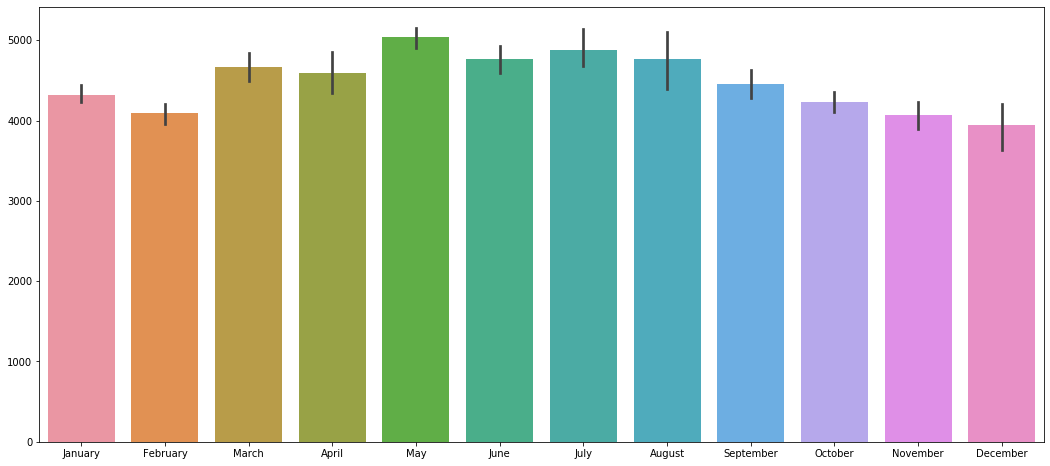

In [104]:
fig = plt.figure(figsize = (18,8))
sns.barplot(data = df)
fig.show()

In [105]:
crime_per_month =  crimes_date.pivot_table(index = 'Year', columns = 'Month',values = 'ID', aggfunc = 'count')

In [106]:
crime_per_month.columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October','November', 'December']

In [107]:
f_oneway(crime_per_month.January, crime_per_month.February, crime_per_month.March, crime_per_month.April, crime_per_month.May, crime_per_month.June, crime_per_month.July,crime_per_month.August, crime_per_month.September, crime_per_month.October, crime_per_month.November,crime_per_month.December )

F_onewayResult(statistic=2.680046426653919, pvalue=0.009092008729090132)

As we can see that the crime per month is changing with respect to year because the pvalue is less so, that we can reject the null hypothesis

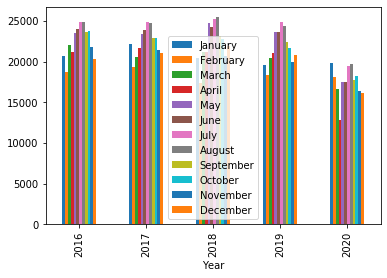

In [108]:
crime_per_month.plot(kind = 'bar')

/Users/yadavvinamrata/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


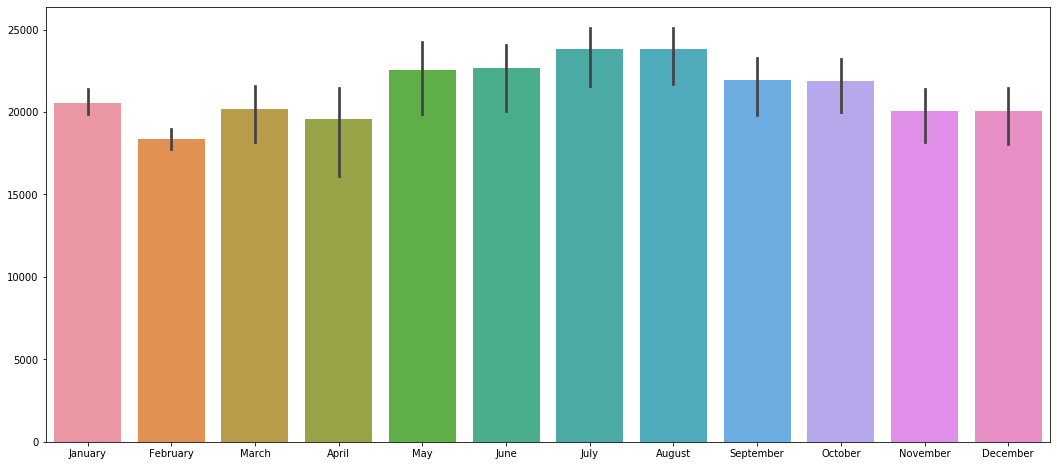

In [109]:
fig = plt.figure(figsize = (18,8))
sns.barplot(data = crime_per_month)
fig.show()

In [110]:
from scipy.stats import ttest_1samp

In [145]:
hypo = crimes.pivot_table(index = 'Community Area',columns = 'Primary Type',values = 'Arrest', aggfunc = 'count')

In [146]:
hypo

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Community Area,,,,,,,,,,,,,,,,,,,,,
1.0,8.0,1337.0,3559.0,841.0,NaN,2384.0,167.0,655.0,1362.0,2.0,...,1080.0,19.0,2.0,69.0,NaN,698.0,134.0,19.0,5274.0,163.0
2.0,19.0,1163.0,2916.0,1029.0,2.0,2185.0,93.0,464.0,1556.0,3.0,...,1139.0,3.0,NaN,60.0,NaN,564.0,107.0,11.0,4147.0,144.0
3.0,12.0,1305.0,3251.0,692.0,2.0,1490.0,175.0,556.0,1957.0,3.0,...,926.0,1.0,NaN,112.0,NaN,528.0,120.0,3.0,4723.0,136.0
4.0,6.0,559.0,1508.0,552.0,2.0,1062.0,102.0,273.0,1140.0,1.0,...,531.0,1.0,NaN,30.0,NaN,215.0,51.0,13.0,2858.0,47.0
5.0,9.0,314.0,586.0,508.0,NaN,668.0,35.0,185.0,941.0,1.0,...,305.0,2.0,1.0,29.0,NaN,186.0,29.0,8.0,2353.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73.0,20.0,1212.0,2972.0,789.0,6.0,1985.0,77.0,478.0,1133.0,3.0,...,1274.0,1.0,NaN,70.0,NaN,559.0,56.0,12.0,2854.0,372.0
74.0,4.0,167.0,421.0,116.0,2.0,331.0,10.0,107.0,437.0,NaN,...,256.0,1.0,NaN,10.0,NaN,31.0,13.0,3.0,649.0,7.0
75.0,11.0,790.0,1836.0,478.0,4.0,1185.0,42.0,252.0,908.0,NaN,...,796.0,NaN,2.0,80.0,NaN,226.0,35.0,6.0,2142.0,178.0


In [132]:
ttest_1samp(hypo.ARSON, hypo.ASSAULT)

Ttest_1sampResult(statistic=Community Area
1.0    -2.374018
2.0     0.009056
3.0    -5.736570
4.0    -6.053352
5.0    -1.439169
          ...   
73.0   -1.125362
74.0   -0.884256
75.0   -1.917674
76.0   -3.236794
77.0   -1.509975
Name: ASSAULT, Length: 77, dtype: float64, pvalue=array([2.01212873e-02, 9.92798387e-01, 1.86444072e-07, 5.00293152e-08,
       1.54208571e-01, 5.62208147e-06, 7.87028352e-01, 5.09919646e-04,
       2.72266518e-01, 7.13558296e-01, 9.92259492e-02, 3.92581760e-01,
       6.92413107e-03, 3.02163624e-01, 2.67692563e-02, 6.35751294e-01,
       1.34036089e-01, 2.64343890e-01, 3.71875839e-01, 4.30564895e-01,
       2.86116637e-02, 3.26404986e-04, 1.89550256e-01, 3.50030001e-02,
       5.51636239e-03, 5.90343621e-02, 2.98248589e-01, 2.59091329e-01,
       1.46913554e-02, 3.54868842e-02, 9.27347762e-03, 5.52721586e-05,
       3.69696920e-02, 4.14176480e-03, 5.03606946e-01, 2.52148790e-02,
       5.80923218e-01, 9.64425585e-01, 8.66656613e-02, 1.58577625e-01,
       4.5

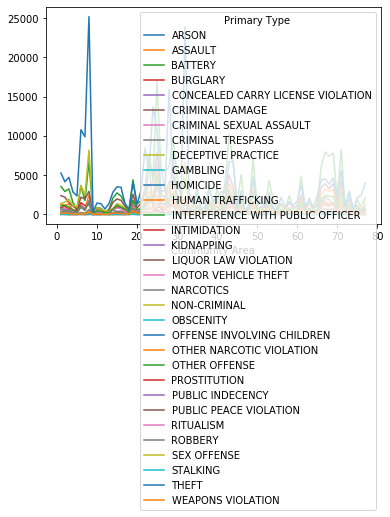

In [153]:
crimes.pivot_table(index = 'Community Area',columns = 'Primary Type', values = 'Case Number', aggfunc = 'count').plot()

In [ ]:
#pip install folium

In [ ]:
import folium

In [ ]:
MapOfChicago = folium.Map(location=[41.881832, -87.623177],
                         zoom_start=13, tiles="CartoDB dark_matter")

In [ ]:
MapOfChicago

In [ ]:
L = crimes['Location'].dropna()
L.nunique()

In [ ]:
n = crimes['Case Number'].count()

In [ ]:
CR_index = pd.DataFrame({"Raw_String" : L , "ValueCount":n})
CR_index.index = range(len(L))
CR_index.head()

In [ ]:
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)

In [ ]:
CR_index['LocationCoord'] = CR_index['Raw_String'].apply(Location_extractor)

In [ ]:
CR_index  = CR_index.drop(columns=['Raw_String'], axis = 1)

In [ ]:
%%time

chicago_map_crime = folium.Map(location=[41.881832, -87.623177],
                         zoom_start=13, tiles="CartoDB dark_matter")

for i in range(500):
    lat = CR_index['LocationCoord'].iloc[i][0]
    long = CR_index['LocationCoord'].iloc[i][1]
    radius = CR_index['ValueCount'].iloc[i] / 20
    
    if CR_index['ValueCount'].iloc[i] > 1000:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               CR_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_map_crime)

In [ ]:
chicago_map_crime